In [8]:
from tensorflow.test import is_built_with_cuda
from tensorflow.config import list_physical_devices
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display setup
plt.style.use("seaborn-v0_8")  # for plots

In [9]:
print(is_built_with_cuda())
print(f"GPUs Available: {list_physical_devices('GPU')}")

True
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [11]:
X_train_full.shape

(50000, 32, 32, 3)

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
from ResidualUnit import ResNet18


In [14]:
model = ResNet18(10, dropout=0.5)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 103s 67ms/step - loss: 2.1566 - accuracy: 0.2713 - val_loss: 2.1248 - val_accuracy: 0.3142

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        9472      
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 residual_unit (ResidualUnit  (None, 8, 8, 64)         74368     
 )                                                               
                                                        

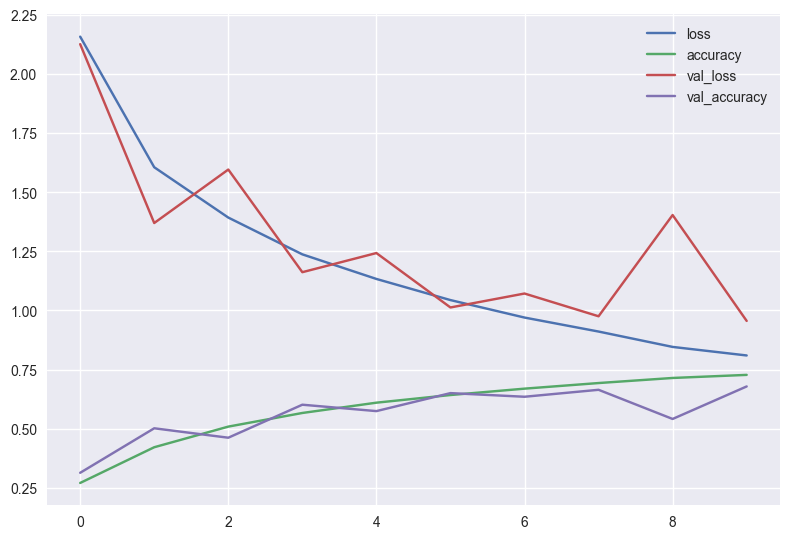

In [22]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.tight_layout()
plt.show()